## Exploration of text similarity using a review dataset, to measure similarity between textual data

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### 1. Text Preprocessing

#### Read the dataset from the given CSV file into a pandas DataFrame.

In [2]:
df = pd.read_csv('MovieReview.csv')
df.head(3)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0


#### Perform text preprocessing tasks such as tokenization, removing stopwords, and stemming or lemmatization on the review text column.

##### Tokenization

In [3]:
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    # Removing special characters and keeping only alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]
    return tokens

##### Removing stopwords

In [4]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    return filtered_tokens

##### Stemming

In [5]:
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

##### Lemmatization

In [6]:
import re
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in lemmatized_tokens if token.isalpha()]
    return lemmatized_tokens

In [7]:
df.head(3)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0


In [8]:
df['text'] = df['text'].apply(tokenize_text)

In [9]:
df['text'] = df['text'].apply(remove_stopwords)

In [10]:
df['text'] = df['text'].apply(stem_tokens)

In [11]:
df['text']  = df['text'].apply(lemmatize_tokens)

#### Display the preprocessed text for a few reviews to observe the changes.

In [12]:
df['text'].head(8)

0    [alway, wrote, seri, complet, jim, belushi, in...
1    [1st, watch, 3, 10, purcel, typic, mari, kate,...
2    [movi, poorli, written, direct, fell, asleep, ...
3    [interest, thing, miryang, secret, sunshin, ac...
4    [first, read, berlin, meer, expect, much, thou...
5    [saw, film, septemb, 1st, 2005, indianapoli, o...
6    [saw, screen, movi, last, night, high, expect,...
7    [william, hurt, may, american, matine, idol, a...
Name: text, dtype: object

#### Plot the frequency of the most common 50 words in the dataset using a word cloud.

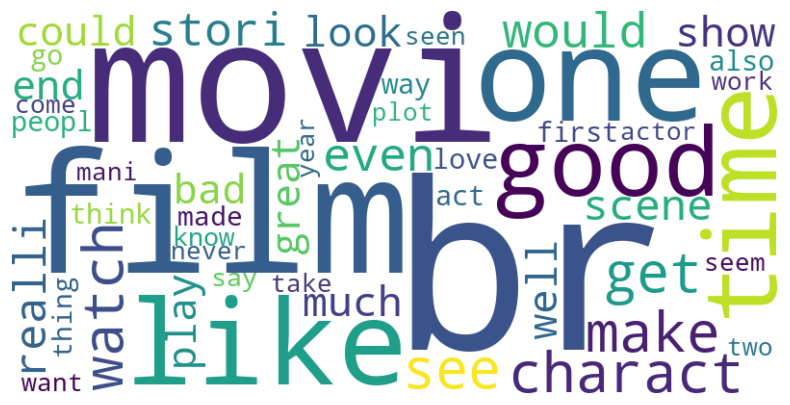

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_tokens = []
for tokens_list in df['text']:
    all_tokens.extend(tokens_list)

token_freq = nltk.FreqDist(all_tokens)

most_common_tokens = token_freq.most_common(50)

wordcloud = WordCloud(width=800, height=400,background_color='white').generate_from_frequencies(dict(most_common_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Text Similarity

#### Create Text1 file with the first 20 reviews and Text2 file with the next 20 reviews from the given dataset.Apply all text preprocessing like tokenization, removing stopwords, and stemming or lemmatization

In [14]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
Text1 = " ".join(df['text'][:20])
Text2 = " ".join(df['text'][20:40])
# Convert 'text' column to sets
df['text'] = df['text'].apply(lambda x: set(x.split()))

# Convert Text1 and Text2 to sets
set1 = set(Text1.split())
set2 = set(Text2.split())


In [15]:
Text1

'alway wrote seri complet jim belushi involv heavili one day tragic happenst occur white sox game end realiz remot way side room somehow could gotten walk across room get remot even tv turn channel get walk across countri watch tv anoth state nut said decid hang tight couch take whatev fate store fate store episod show episod rememb littl except made broad gener sweep blanket judgment base zero object experienti evid noth whatsoev back opinion complet right show total belushi comed deliveri hairi lighthous foghorn woman physic attract elicit real feel viewer absolut reason stop run local tv station gasolin flamethrow send everi copi mutt howl back hell br br except br br except wonder comic sti ling larri joe campbel america greatest comic charact actor guy play belushi andi gold good realli well asid funni job make belushi look good like tri make butt wart look good campbel pull style someon invent nobel prize comic buffooneri win everi year without larri joe show would consist slight

In [16]:
Text2

'love jone cleverli portray young men woman clear posit realist sen feel actor actress magnific realli great job captur mood nia long larenz tate work well togeth hope see work two matter fact fine job would great see anoth movi compar romant comedi seen movi alreadi strongli recommend definit give anoth perspect life love film terribl honestli act terribl script made cring effect complet lousi usual mind older film made two year ago everyth annoy friend go halloween wood meet witch cannib son cours cliché realli believ ha ha ha stori routin drag witch cannib son made retard know comedi make creepi film fail minim gore nuditi made bad film even wors heck good thing film leg eat scene even could br br honestli even wast time watch cabl certainli consid buy rent el kick wast time could spent someth construct entertain funni film like lot cari elw play robin hood tee cours usual good v evil robin evil sheriff nottingham humor sort face stuff part still work well comedi night want think mu

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

#### Apply the cosine similarity function to calculate the similarity between Text1 and Text2. Display the similarity scores

In [18]:
vectorizer = CountVectorizer().fit_transform([Text1, Text2])
cosine_sim = cosine_similarity(vectorizer)

print("Cosine Similarity between Text1 and Text2:")
print(cosine_sim[0][1])


Cosine Similarity between Text1 and Text2:
0.8174450314562696


#### Apply the Jaccard similarity function to calculate the similarity between pairs of reviews in the dataset.

In [19]:
def jaccard_similarity(set1,set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [20]:
similarity_score = jaccard_similarity(set1=set1,set2=set2)
print(f"Jaccard Similarity :{similarity_score}")

Jaccard Similarity :0.22909450766947057


#### Visualize the similarity scores using any plot such as bar plots, heatmaps, or scatter plots

In [21]:
similarity_df = pd.DataFrame({
    'Similarity Method': ['Cosine Similarity', 'Jaccard Similarity'],
    'Similarity Score': [cosine_sim[0][1], similarity_score]
})

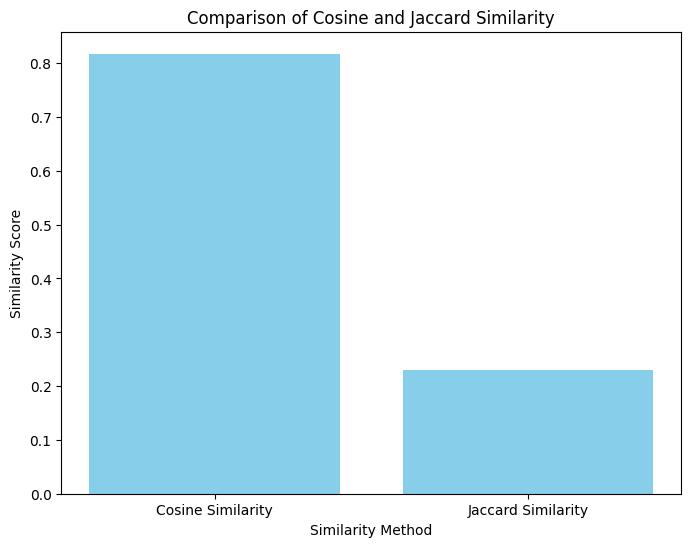

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(similarity_df['Similarity Method'], similarity_df['Similarity Score'], color='skyblue')
plt.xlabel('Similarity Method')
plt.ylabel('Similarity Score')
plt.title('Comparison of Cosine and Jaccard Similarity')
plt.show()